In [1]:
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np
import statistics

In [2]:
def rng(x, multiplier, increment, modulus):
    return (multiplier * x + increment) % modulus

def generate_random_numbers(seed,n,multiplier,increment,modulus):
    x = rng(seed, multiplier, increment, modulus)
    random_numbers = [x]
    i = 1
    while i < n:
        xi = rng(x, multiplier, increment, modulus)
        random_numbers.append(xi)
        x = xi
        i += 1
    return random_numbers

In [3]:
def chiSquared(random_generated_numbers,num_bins):
    n = len(random_generated_numbers)
    expected_frequency = n / num_bins
    bins, _ = np.histogram(random_generated_numbers, num_bins)
    chi_squared_statistic = sum(
        ((bin_count - expected_frequency) ** 2) / expected_frequency
        for bin_count in bins
    )
    return chi_squared_statistic

In [4]:
def kolmogorovSmirnov(random_generated_numbers,num_bin):
    n = len(random_generated_numbers)
    bins, _ = np.histogram(random_generated_numbers, num_bins)
    expected_frequency = n/num_bins
    cs_obtained = np.cumsum(bins)
    cs_expected = np.cumsum(np.ones(len(bins)) * expected_frequency)
    d = np.max(np.abs(cs_obtained - cs_expected))
    return d

In [5]:
def waldWolfowitzRunTest(random_generated_numbers):
    median = np.median(random_generated_numbers)

    # Count the number of runs
    runs = sum([1 for i in range(1, len(random_generated_numbers)) if (
        random_generated_numbers[i] >= median and random_generated_numbers[i-1] < median) or
        (random_generated_numbers[i] < median and random_generated_numbers[i-1] >= median)])

    # Count the number of values above and below the median
    n1 = sum([1 for num in random_generated_numbers if num >= median])
    n2 = len(random_generated_numbers) - n1

    # Calculate the expected number of runs (i.e. the mean)
    exp = ((2 * n1 * n2) / (n1 + n2)) + 1

    # Calculate the standard deviation of the runs
    std = math.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) /
                         (((n1 + n2) ** 2) * (n1 + n2 - 1)))

    # Calculate the z-score
    z = (runs - exp) / std

    return runs,z

In [6]:
def upDownRunTest(random_generated_numbers, n):
    up_runs = []
    down_runs = []
    prev_direction = None
    current_run = []

    for i in range(1, len(random_generated_numbers)):
        direction = None
        if random_generated_numbers[i] > random_generated_numbers[i - 1]:
            direction = "up"
        elif random_generated_numbers[i] < random_generated_numbers[i - 1]:
            direction = "down"

        # Handle the first direction separately
        if prev_direction is None:
            prev_direction = direction
            current_run.append(random_generated_numbers[i - 1])
            continue

        # If the direction changes, record the length of the current run
        if direction != prev_direction:
            if prev_direction == "up":
                up_runs.append(len(current_run))
            else:
                down_runs.append(len(current_run))
            current_run = []
            
        # Add the number to the current run
        current_run.append(random_generated_numbers[i - 1])
        prev_direction = direction

    # Record the length of the final run
    if prev_direction == "up":
        up_runs.append(len(current_run))
    else:
        down_runs.append(len(current_run))

    # Calculate the total number of runs
    runs = len(up_runs) + len(down_runs)

    # Calculate the z-score
    exp = (2 * n - 1) / 3
    std = math.sqrt((16 * n - 29) / 90)
    z = (runs - exp) / std

    return runs,z

In [7]:
def autocorrelation(random_generated_numbers, lag):
    n = len(random_generated_numbers)   
    mean = sum(random_generated_numbers) / n    
    # Autocovariance 
    def acv(k):
        products = [(random_generated_numbers[i] - mean) * (random_generated_numbers[i+k] - mean) for i in range(n-k)]        
        return np.mean(products)
     # Autocorrelation 
    def r(k):
        return acv(k) / acv(0)
    
    # Calculate the autocorrelation with the specified lag
    return r(lag)

In [8]:
lag_value = 10

def runTests(seed,n,multiplier,increment,modulus,num_bins,graph):
    random_numbers = generate_random_numbers(seed,n,multiplier,increment,modulus)

    # Create a figure with two subplots
    if graph:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
        # Plot histogram
        ax1.hist(random_numbers, bins=num_bins)
        ax1.set_xlabel('Random Number')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Histogram of Random Numbers')

        # Plot scatter plot
        ax2.scatter(random_numbers[-1:] + random_numbers[:-1], random_numbers)
        ax2.set_xlabel('Random Number[i-1]')
        ax2.set_ylabel('Random Number[i]')
        ax2.set_title('Scatter Plot of Random Numbers')

        # Adjust spacing between subplots
        plt.tight_layout()
        plt.show()
    
    # Calculate and print chi-squared test results
    chi_squared_random = chiSquared(random_numbers, num_bins)
    print(f"Chi-squared test: {chi_squared_random}")

    # Calculate and print Wald-Wolfowitz run test results
    wald_random = waldWolfowitzRunTest(random_numbers)
    print(f"Wald-Wolfowitz Run Test: {wald_random}")

    # Calculate and print up-down run test results
    updown_random = upDownRunTest(random_numbers, n)
    print(f"Up-Down Run Test: {updown_random}")

    # Calculate and print autocorrelation results
    autocorr_random = autocorrelation(random_numbers, lag_value)
    print(f"Autocorrelation: with a lag of {lag_value} : {autocorr_random}")

def testPythonRNG(n,maxN):
    python_random_numbers = [random.randint(0, maxN) for _ in range(n)]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Plot histogram
    ax1.hist(python_random_numbers, bins=maxN)
    ax1.set_xlabel('Random Number')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of Random Numbers')

    # Plot scatter plot
    ax2.scatter(python_random_numbers[-1:] + python_random_numbers[:-1], python_random_numbers)
    ax2.set_xlabel('Random Number[i-1]')
    ax2.set_ylabel('Random Number[i]')
    ax2.set_title('Scatter Plot of Random Numbers')

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

    # Calculate and print chi-squared test results
    chi_squared_python = chiSquared(python_random_numbers, maxN)
    print(f"Chi-squared test: {chi_squared_python}")

    # Calculate and print Wald-Wolfowitz run test results
    wald_python = waldWolfowitzRunTest(python_random_numbers)
    print(f"Wald-Wolfowitz Run Test: {wald_python}")

    # Calculate and print up-down run test results
    updown_python = upDownRunTest(python_random_numbers, n)
    print(f"Up-Down Run Test: {updown_python}")

    # Calculate and print autocorrelation results
    autocorr_python = autocorrelation(python_random_numbers, lag_value)
    print(f"Autocorrelation: with a lag of {lag_value} : {autocorr_python}")


###################################
Running Tests for :
seed = 3 
n = 1000 
multiplier = 5 
increment = 1 
modulus = 16
###################################


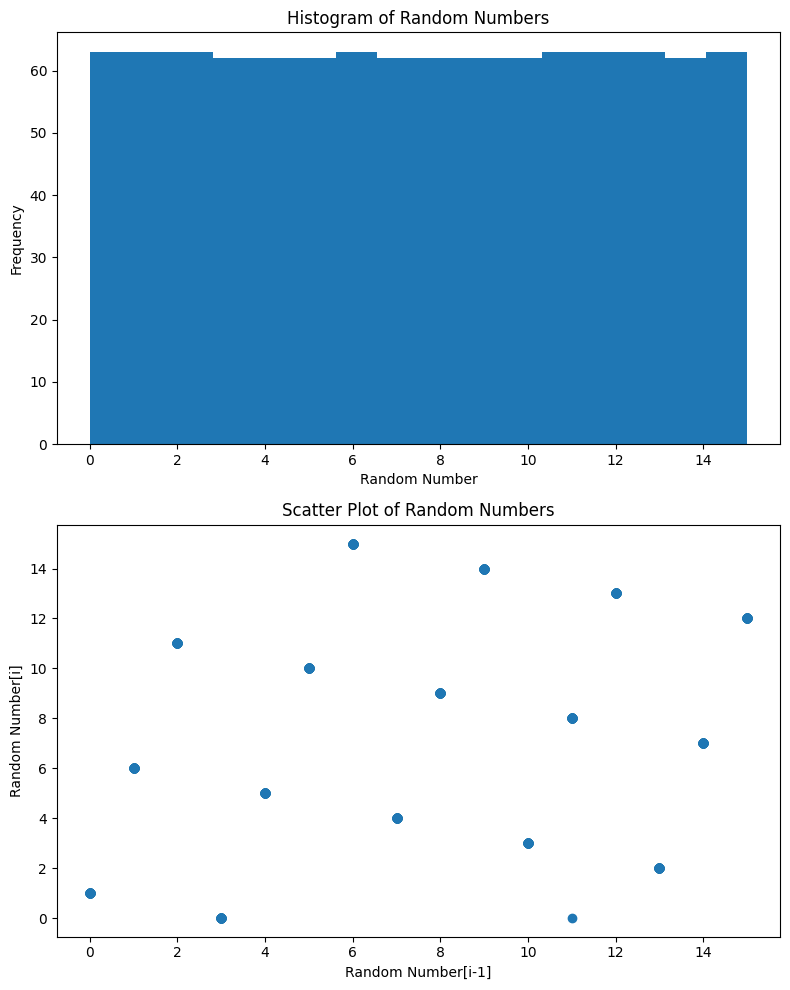

Chi-squared test: 0.06400000000000003
Wald-Wolfowitz Run Test: (375, -7.972931158772478)
Up-Down Run Test: (625, -3.102813199771579)
Autocorrelation: with a lag of 10 : -0.03497232048568195


In [9]:
seed = 3
n = 1000
multiplier = 5
increment = 1
modulus = 16
num_bins=modulus

print('###################################')
print('Running Tests for :')
print("seed =", seed, "\nn =", n, "\nmultiplier =", multiplier, "\nincrement =", increment, "\nmodulus =", modulus)
print('###################################')
runTests(seed,n,multiplier,increment,modulus,num_bins,1)

###################################
Running Tests for Pythons RNG:
###################################


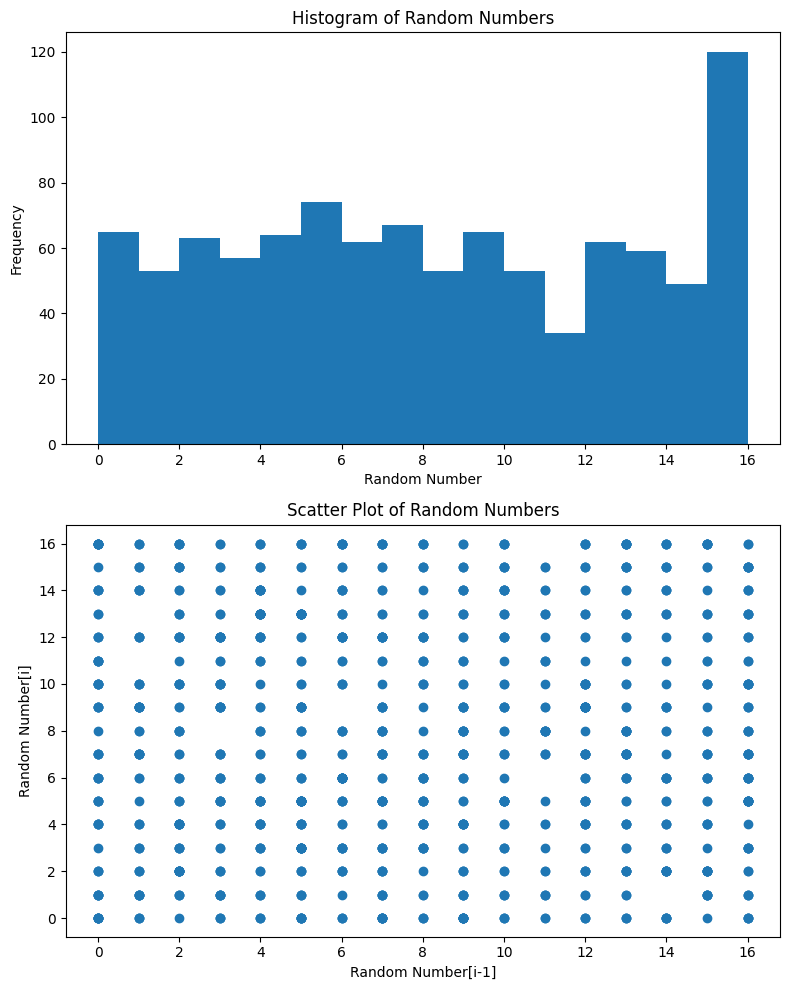

Chi-squared test: 76.512
Wald-Wolfowitz Run Test: (483, -0.6627149254905387)
Up-Down Run Test: (649, -1.3011797289364704)
Autocorrelation: with a lag of 10 : -0.009216192182560742


In [10]:
seed = 3
n = 1000
multiplier = 5
increment = 1
modulus = 16
num_bins=modulus

print('###################################')
print('Running Tests for Pythons RNG:')
print('###################################')
testPythonRNG(n,modulus)

In [11]:
###### seed = 3
n = 10000
multiplier = 5
increment = 1
modulus = 16
num_bins=modulus

print('\n')
print('###################################')
print('Running Tests for :')
print("seed =", seed, "\nn =", n, "\nmultiplier =", multiplier, "\nincrement =", increment, "\nmodulus =", modulus)
runTests(seed,n,multiplier,increment,modulus,num_bins,0)
print('###################################')

seed = 5
n = 10000
multiplier = 20
increment = 1
modulus = 1234
num_bins=modulus

print('\n')
print('###################################')
print('Running Tests for :')
print("seed =", seed, "\nn =", n, "\nmultiplier =", multiplier, "\nincrement =", increment, "\nmodulus =", modulus)
runTests(seed,n,multiplier,increment,modulus,num_bins,0)
print('###################################')

seed = 5
n = 10000
multiplier = 2
increment = 1
modulus = 10
num_bins=modulus

print('\n')
print('###################################')
print('Running Tests for :')
print("seed =", seed, "\nn =", n, "\nmultiplier =", multiplier, "\nincrement =", increment, "\nmodulus =", modulus)
runTests(seed,n,multiplier,increment,modulus,num_bins,0)
print('###################################')



###################################
Running Tests for :
seed = 3 
n = 10000 
multiplier = 5 
increment = 1 
modulus = 16
Chi-squared test: 0.0
Wald-Wolfowitz Run Test: (3750, -25.0212512189641)
Up-Down Run Test: (6250, -9.875106965999812)
Autocorrelation: with a lag of 10 : -0.03561443796737914
###################################


###################################
Running Tests for :
seed = 5 
n = 10000 
multiplier = 20 
increment = 1 
modulus = 1234
Chi-squared test: 210358.8352000015
Wald-Wolfowitz Run Test: (5001, 0.0)
Up-Down Run Test: (6785, 2.8146822096845034)
Autocorrelation: with a lag of 10 : 0.008834055356938868
###################################


###################################
Running Tests for :
seed = 5 
n = 10000 
multiplier = 2 
increment = 1 
modulus = 10
Chi-squared test: 15000.0
Wald-Wolfowitz Run Test: (4999, -0.04000200035006251)
Up-Down Run Test: (5000, -39.524147096103356)
Autocorrelation: with a lag of 10 : -1.0
###################################


### 